# Cu G
| |Cu-K dTHF + EtOH|Cu-F dTHF + dEtOH|Cu-G THF + dEtOH|
|---|---|---|---|
|Air |206864|206822|206829|
|OCV 1|207268|207161|207194|
|CP 1|207275|207168|207201|
|OCV 2|207282|207169|207202
|CP 2|207289|207176|207209
|OCV 3|207296|207177|207210






In [2]:
import sys
import os
import time
import numpy as np
np.random.seed(42)

import json

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
git_dir = os.path.join(os.path.expanduser('~'), 'git', 'nh3-analysis')

from refl1d.names import *
from refl1d import errors

from bumps.fitters import fit

import importlib

import copper_sample as cu
importlib.reload(cu)

<module 'copper_sample' from '/Users/mathieu/git/nh3-analysis/july2023/notebooks/copper_sample.py'>

# OCV 1

# steps: 84, # draws: 10080
step 1 cost 13.942(60)
                               intensity .....|....          1 in (0.8,1.15)
                           THF interface .........|         20 in (1,20)
                                 THF rho .........|   0.999999 in (-1,1)
                            Cu interface ...|......      15.24 in (11,22)
                                  Cu rho ..|.......      6.446 in (6.3,7)
                            Cu thickness ....|.....      560.6 in (400,800)
                            Ti interface .........|         10 in (1,10)
                                  Ti rho ......|...         -2 in (-4,-1)
                            Ti thickness ....|.....    50.9999 in (10,100)
                          siox interface .|........    2.92001 in (1,11)
                                siox rho ........|.        3.2 in (-1,4)
                          siox thickness ......|...         32 in (10,45)
step 43 cost 4.583(60)
step 87 cost 1.749(60)
step 131 cost 

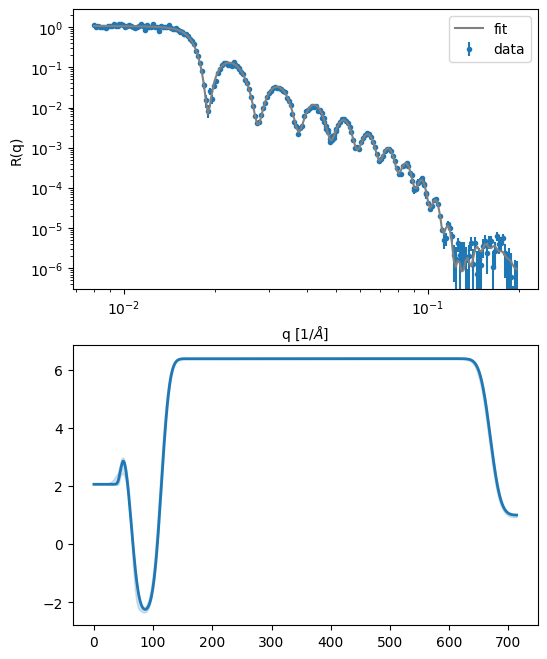

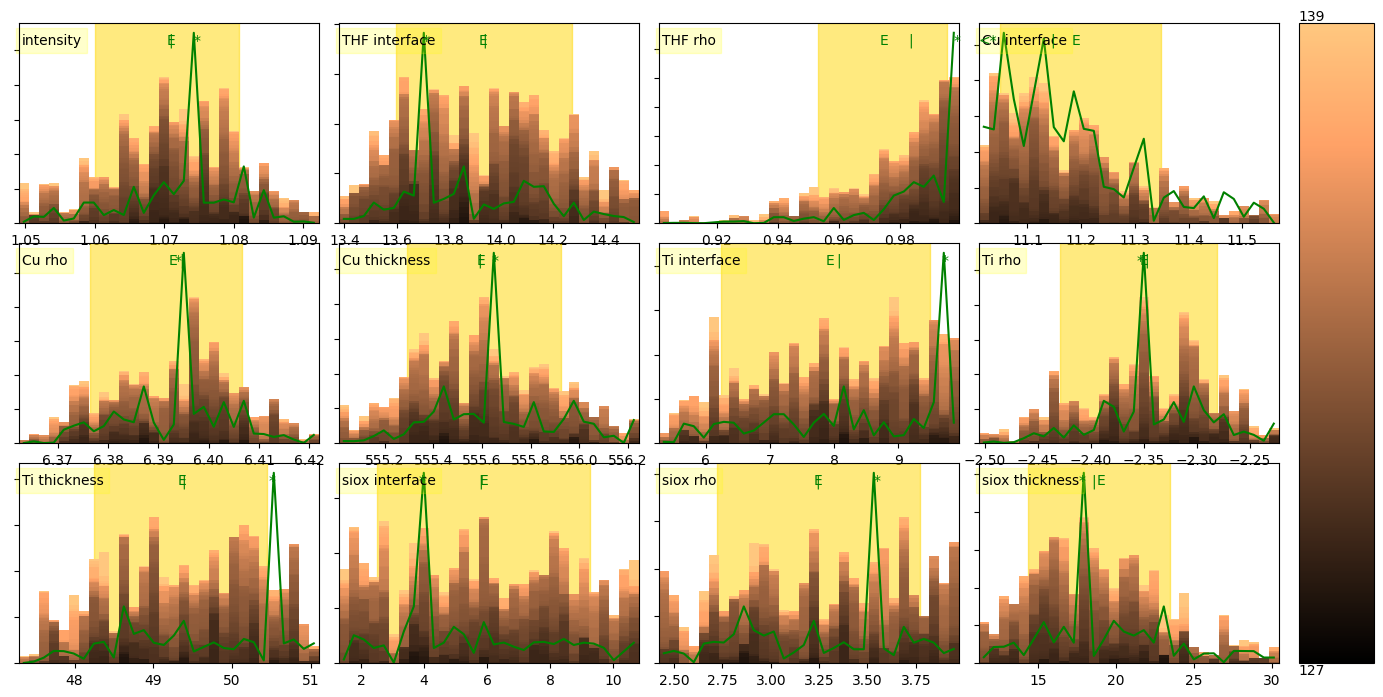

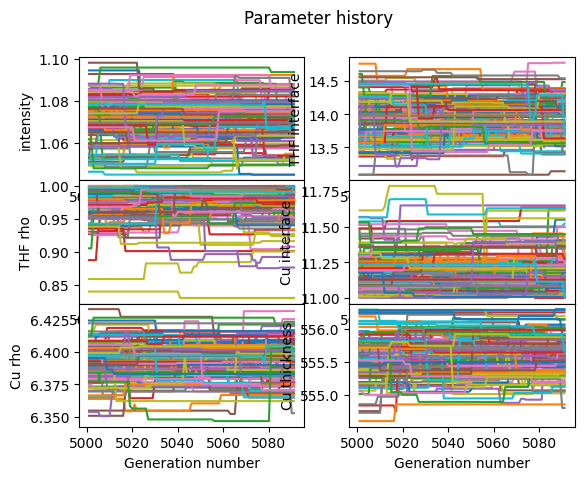

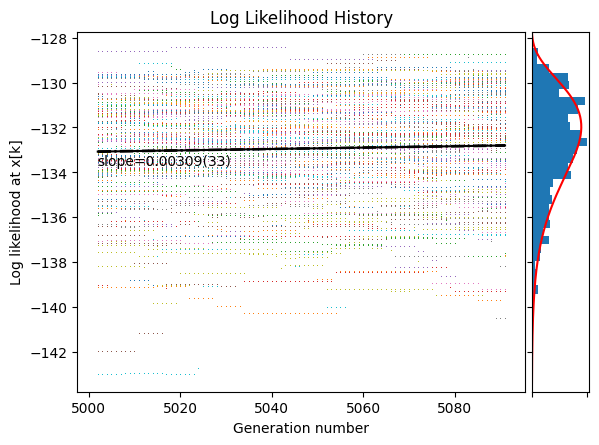

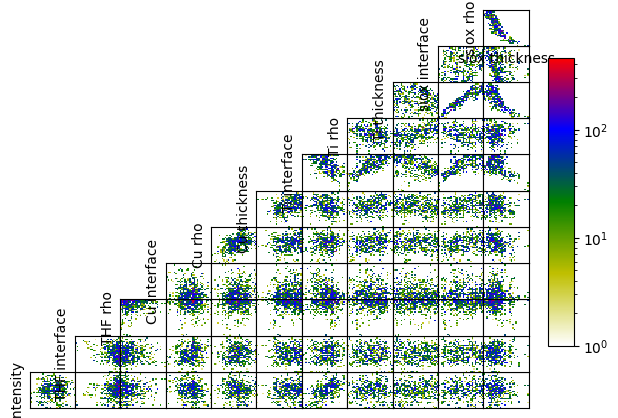

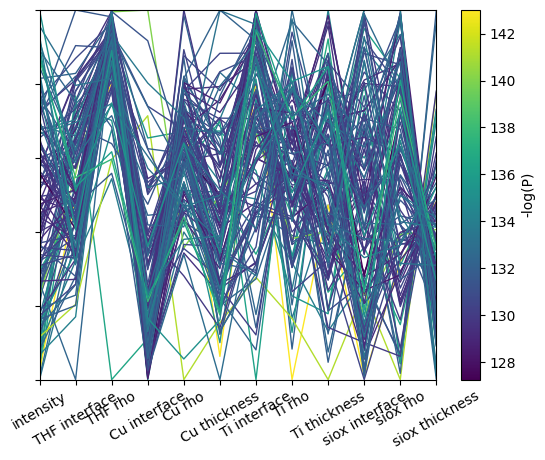

In [8]:
importlib.reload(cu)
data_file = os.path.join(git_dir, 'july2023', 'data', 'reduced', 'REFL_207194_combined_data_auto.txt')

meas = cu.Measurement_CuG_OCV1(data_file, n_sample=10000)
meas.fit()

meas.plot(portion=.1)
meas.results.state.show()
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '')
cu.write_markdown_table(meas, os.path.join(git_dir, 'july2023', 'data', 'results', table_name))

refl1d_output = table_name.replace('.md', '')

meas.problem.save(os.path.join(git_dir, 'july2023', 'data', 'results', 'refl1d_output', refl1d_output))

# OCV 2

Using THF SLD =    1
Using Cu SLD =  6.4
# steps: 770, # draws: 100100
step 1 cost 6.796(65)
                               intensity .......|..          1 in (0.5,1.15)
                           THF interface ....|.....      54.16 in (1,120)
                           SEI interface ...|......    9.74002 in (1,25)
                                 SEI rho ....|.....          3 in (0,7)
                           SEI thickness ......|...        222 in (10,350)
                            Cu interface ......|...      15.24 in (5,22)
                            Cu thickness ......|...    560.599 in (10,800)
                            Ti interface .......|..       11.1 in (1,15)
                                  Ti rho ....|.....         -2 in (-4,0)
                            Ti thickness ....|.....         51 in (10,100)
                          siox interface .|........       2.92 in (1,11)
                                siox rho .......|..        3.2 in (0.3,4.2)
                  

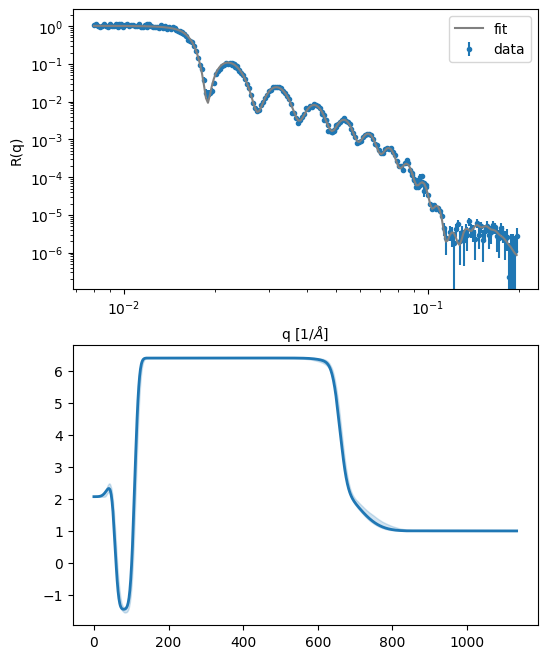

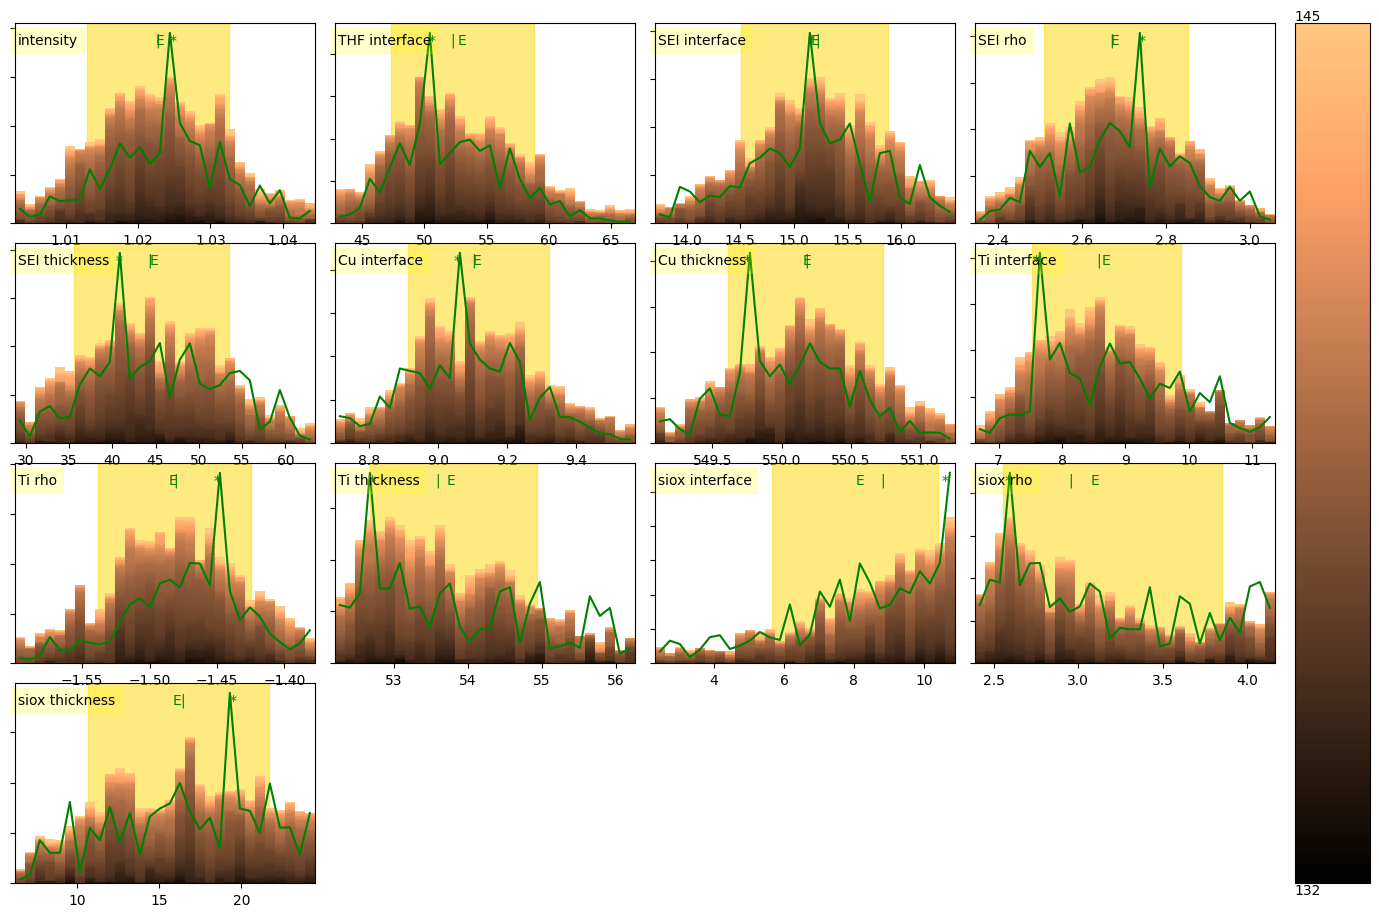

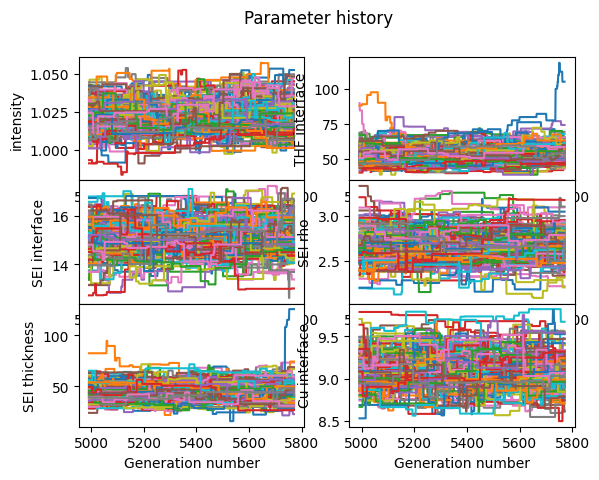

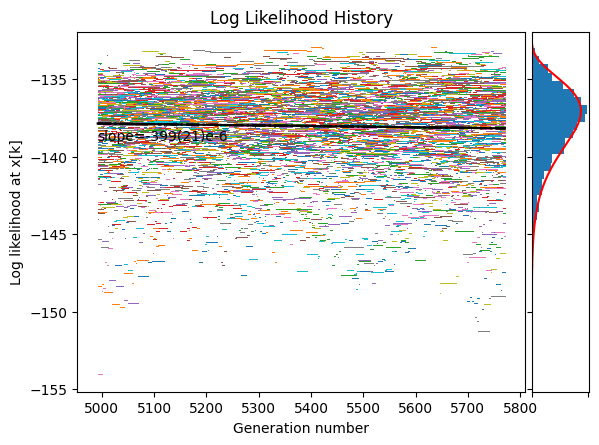

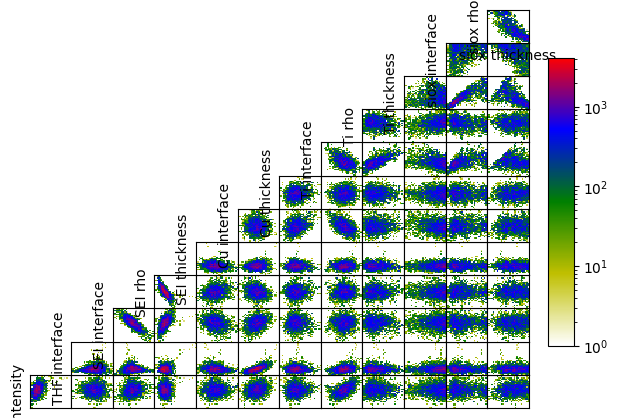

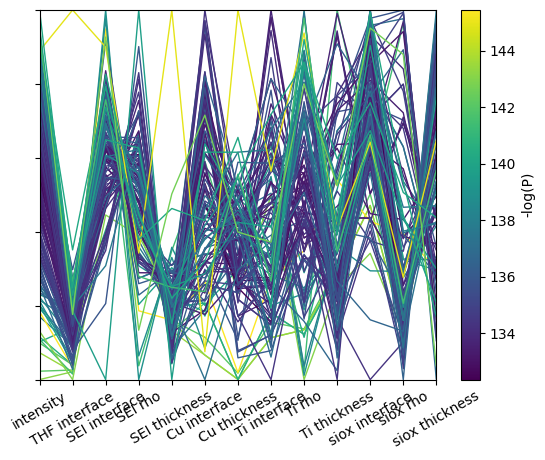

In [20]:
importlib.reload(cu)
thf_sld = 1
cu_sld = 6.394
print("Using THF SLD = %4.2g" % thf_sld)
print("Using Cu SLD = %4.2g" % cu_sld)

data_file = os.path.join(git_dir, 'july2023', 'data', 'reduced', 'REFL_207202_combined_data_auto.txt')
meas = cu.Measurement_CuG_OCV2(data_file, n_sample=100000)
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld
meas.fit()

meas.plot(portion=0.1)
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '')
refl1d_output = table_name.replace('.md', '')

model_path = os.path.join(git_dir, 'july2023', 'data', 'results', 'refl1d_output', refl1d_output)
meas.results.state.show(figfile=model_path)

cu.write_markdown_table(meas, os.path.join(git_dir, 'july2023', 'data', 'results', table_name))
meas.problem.save(model_path)

# OCV 3


# steps: 770, # draws: 100100
step 1 cost 12.508(65)
                               intensity .......|..          1 in (0.5,1.15)
                           THF interface ....|.....      54.16 in (1,120)
                           SEI interface ...|......    9.74002 in (1,25)
                                 SEI rho ....|.....          3 in (0,7)
                           SEI thickness ......|...        222 in (10,350)
                            Cu interface ......|...      15.24 in (5,22)
                            Cu thickness ......|...    560.599 in (10,800)
                            Ti interface .......|..       11.1 in (1,15)
                                  Ti rho .....|....         -2 in (-4,0)
                            Ti thickness ....|.....         51 in (10,100)
                          siox interface .|........       2.92 in (1,11)
                                siox rho ......|...        3.2 in (1.3,4.2)
                          siox thickness .........|       

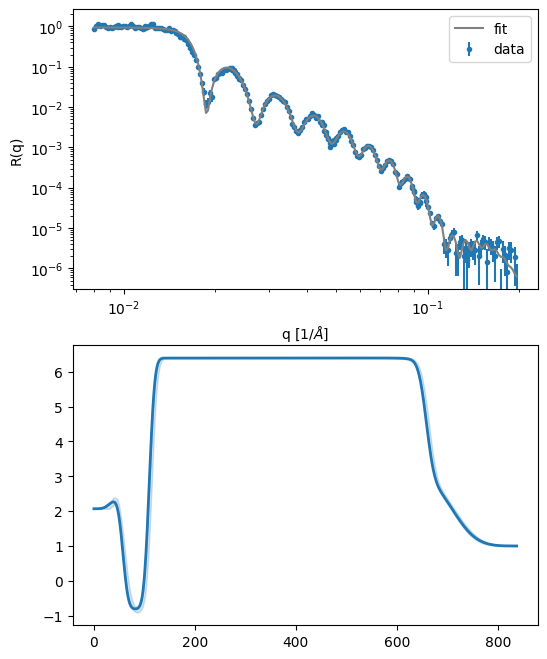

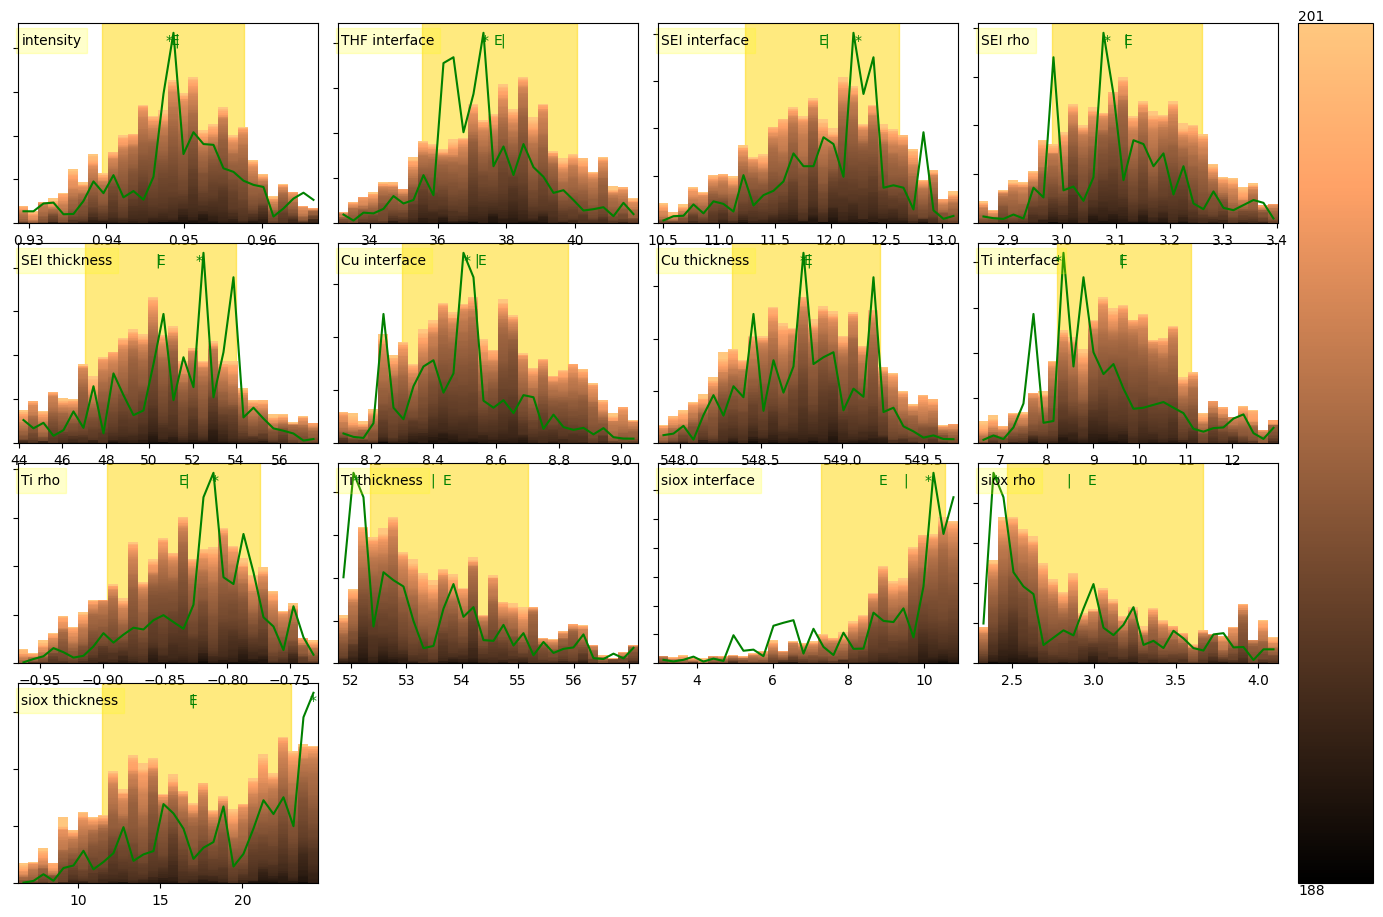

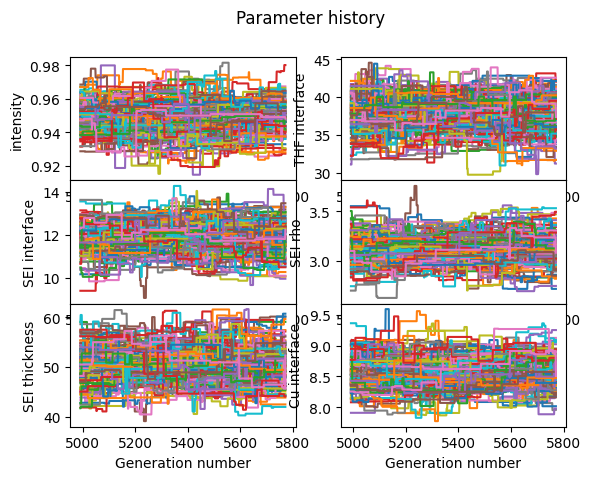

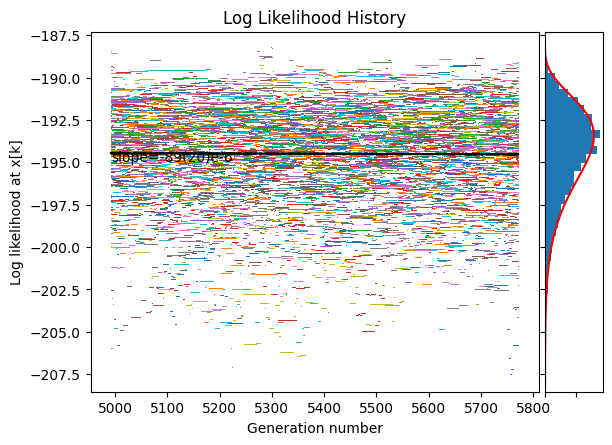

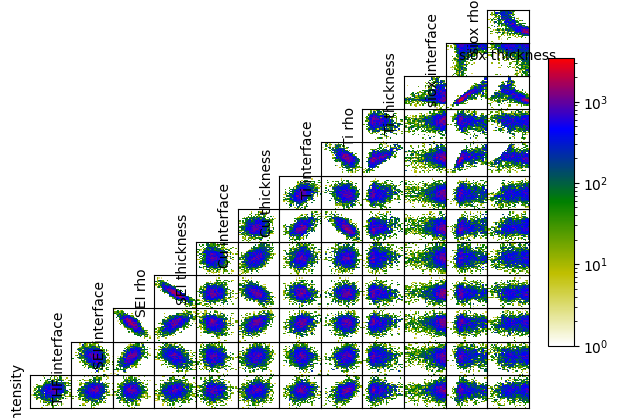

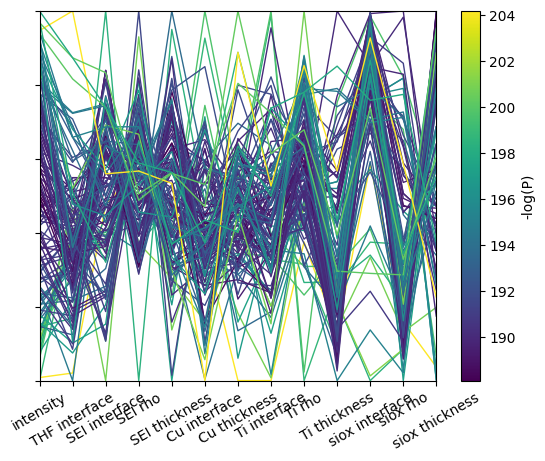

In [15]:
importlib.reload(cu)
data_file = os.path.join(git_dir, 'july2023', 'data', 'reduced', 'REFL_207210_combined_data_auto.txt')
meas = cu.Measurement_CuG_OCV2(data_file, n_sample=100000)
thf_sld = 1
cu_sld = 6.394
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld
meas.fit()
meas.plot(portion=.1)
meas.results.state.show()
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '')
cu.write_markdown_table(meas, os.path.join(git_dir, 'july2023', 'data', 'results', table_name))
refl1d_output = table_name.replace('.md', '')

meas.problem.save(os.path.join(git_dir, 'july2023', 'data', 'results', 'refl1d_output', refl1d_output))

# OCV 4

# steps: 770, # draws: 100100
step 1 cost 21.028(65)
                               intensity .......|..          1 in (0.5,1.15)
                           THF interface ....|.....    54.1599 in (1,120)
                           SEI interface ...|......    9.73998 in (1,25)
                                 SEI rho ....|.....    3.00001 in (0,7)
                           SEI thickness ......|...        222 in (10,350)
                            Cu interface ......|...      15.24 in (5,22)
                            Cu thickness ......|...    560.599 in (10,800)
                            Ti interface .......|..       11.1 in (1,15)
                                  Ti rho .....|....         -2 in (-4,0)
                            Ti thickness ....|.....    50.9999 in (10,100)
                          siox interface .|........       2.92 in (1,11)
                                siox rho .......|..        3.2 in (0.3,4.2)
                          siox thickness .........|       

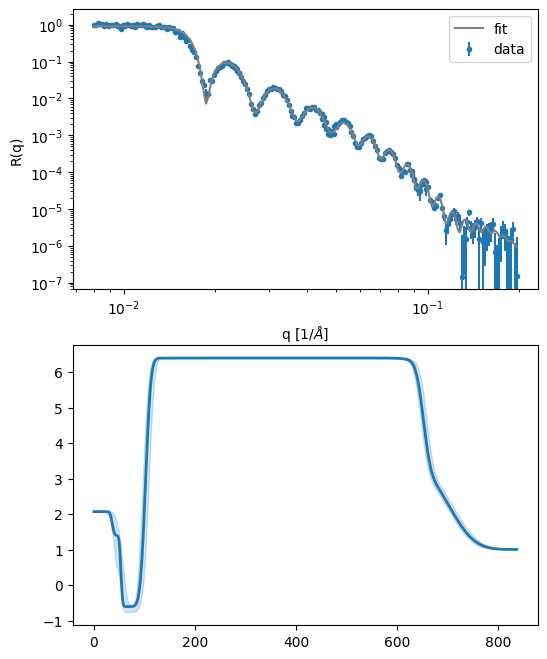

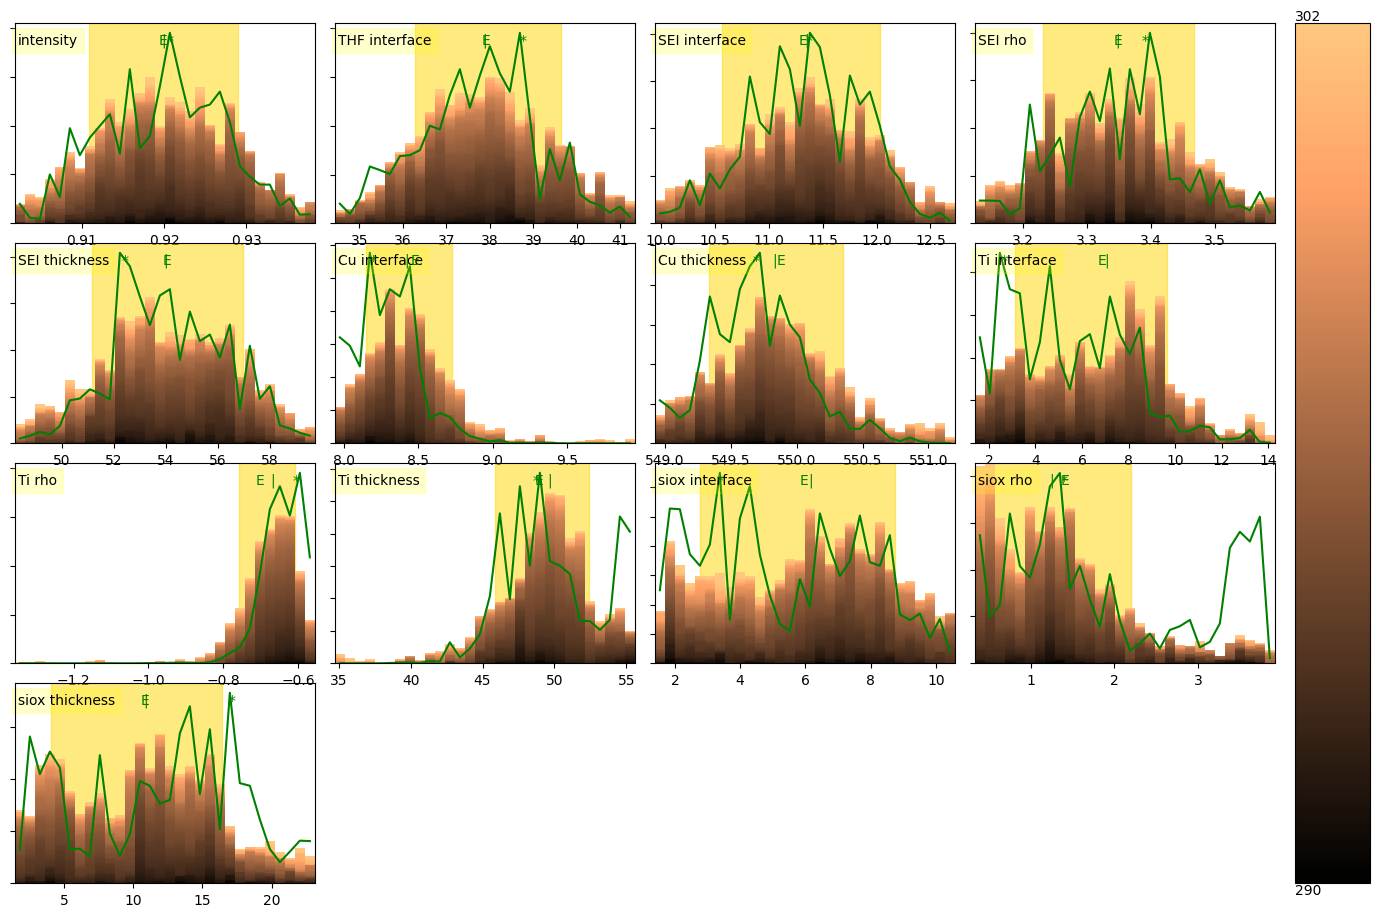

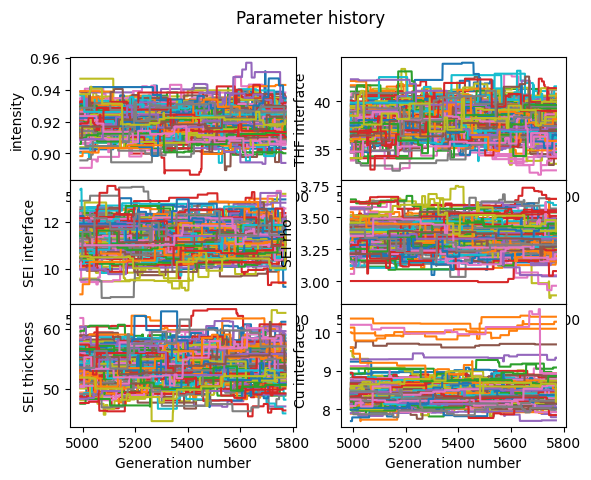

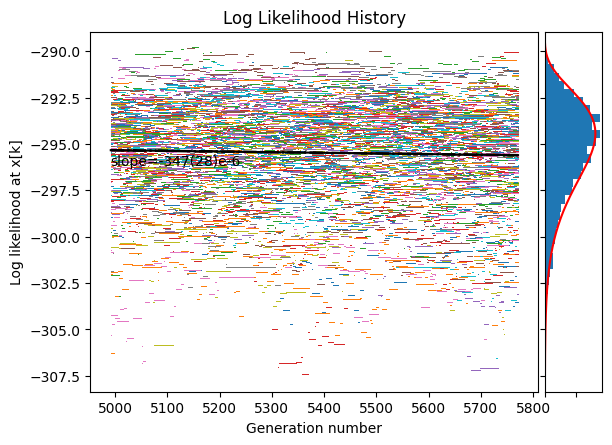

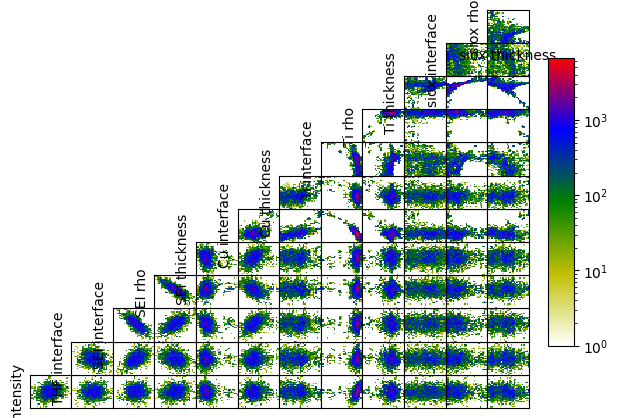

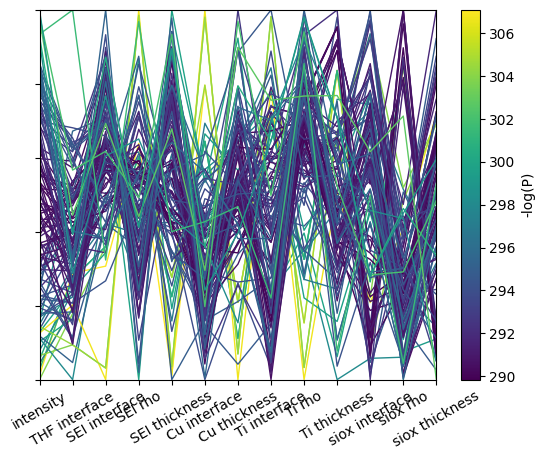

In [18]:
importlib.reload(cu)
data_file = os.path.join(git_dir, 'july2023', 'data', 'reduced', 'REFL_207218_combined_data_auto.txt')
meas = cu.Measurement_CuG_OCV2(data_file, n_sample=100000)
thf_sld = 1
cu_sld = 6.394
meas.thf_sld = thf_sld
meas.cu_sld = cu_sld
meas.fit()
meas.plot(portion=.1)
meas.results.state.show()
table_name = data_file.split('/')[-1].replace('.txt', '.md').replace('_combined_data_auto', '')
cu.write_markdown_table(meas, os.path.join(git_dir, 'july2023', 'data', 'results', table_name))
refl1d_output = table_name.replace('.md', '')
meas.problem.save(os.path.join(git_dir, 'july2023', 'data', 'results', 'refl1d_output', refl1d_output))

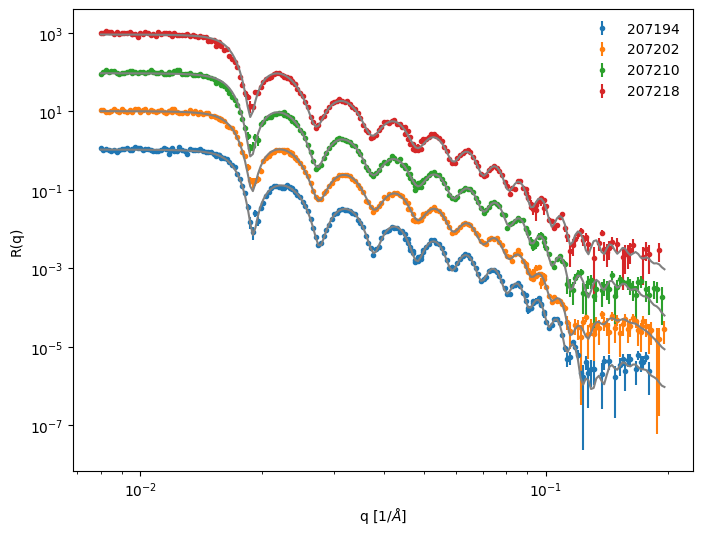

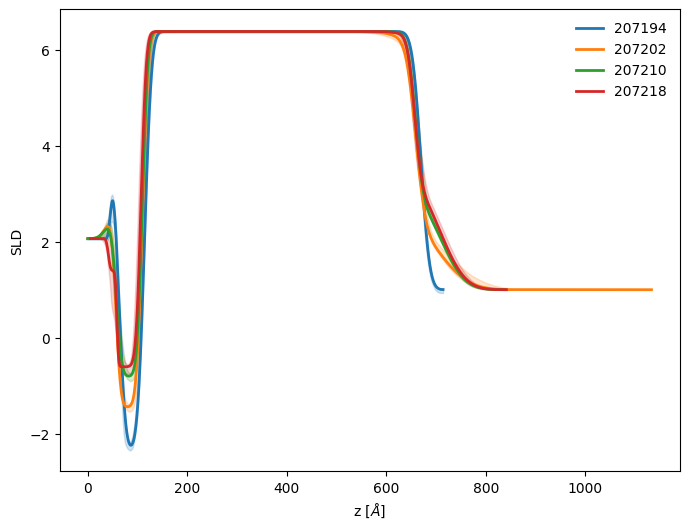

In [3]:
data_list = [207194, 207202, 207210, 207218]
z_offset = [0, 0, 0, 5]

fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

scale = 1
multiplier = 10
for run in data_list:
    data_file = os.path.join(git_dir, 'july2023', 'data', 'reduced', 'REFL_%s_combined_data_auto.txt' % run)
    raw_data = np.loadtxt(data_file, skiprows=1).T
    ocv_fit = os.path.join(git_dir, 'july2023', 'data', 'results', 'REFL_%s.json' % run)

    idx = raw_data[2] < raw_data[1]
    plt.errorbar(raw_data[0][idx], scale*raw_data[1][idx], yerr=scale*raw_data[2][idx], label=run, linestyle='', marker='.')

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(raw_data[0], scale*np.asarray(data['r_calc']), color='gray', label='', zorder=10)
    
    scale *= multiplier

plt.gca().legend(frameon=False)
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')
plt.savefig('july2023-Rq-Cu-G.png')


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'july2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())


plt.gca().legend(frameon=False)
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD')
plt.savefig('july2023-Cu-G.svg')
plt.savefig('july2023-Cu-G.png')